<a href="https://colab.research.google.com/github/Raiden-Makoto/510Spadina/blob/main/styletransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# [linux & win] cuda 12.6 version
!pip3 -q install -U xformers --index-url https://download.pytorch.org/whl/cu126

In [2]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [3]:
from diffusers import StableDiffusionImg2ImgPipeline, StableDiffusionPipeline

In [4]:
import torch
from PIL import Image

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "xyn-ai/anything-v4.0"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None
).to(device)
pipe.enable_xformers_memory_efficient_attention()
pipe.enable_attention_slicing("max")  # uses the smallest possible slices (lowest VRAM, slowest)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [24]:
pipe = torch.compile(pipe)

In [36]:
prompt = "1girl, blonde, blush, portrait, dress"
negative_prompt = "realistic, photorealistic, low quality, blur"

In [37]:
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=1,
    strength=0.6,            # 0 = keep original, 1 = completely new
    guidance_scale=7.5,       # how strongly to follow the prompt
    num_inference_steps=30    # number of diffusion steps
).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

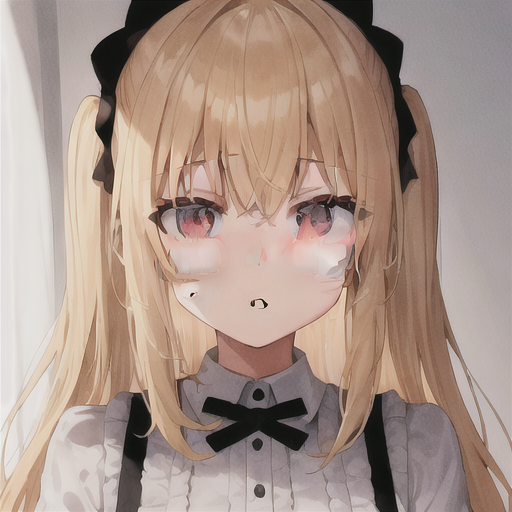

In [38]:
result